# Imports

In [37]:
import numpy as np
import itertools
import math
import heapq
import pandas as pd
import matplotlib.pyplot as plt
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr

# Solution

In [4]:
arr = np.array([[(80,6), (50,4), (83,7), (31,2), (60,4)],
                [(89,8), (10,1), (37,3), (70,4), (90,10)],
                [(17,1), (40,3), (73,4), (100,15), (20,2)],
                [(41,3), (79,5), (23,2), (47,3), (30,2)]])

## Max p second pick

In [8]:
thresh = np.zeros((4, 5))
for i in range(4):
    for j in range(5):
        mult, hunt = arr[i, j]
        thresh[i, j] = (mult - 5 * hunt)/500
with np.printoptions(precision=3, suppress=True):
    print(thresh)

[[0.1   0.06  0.096 0.042 0.08 ]
 [0.098 0.01  0.044 0.1   0.08 ]
 [0.024 0.05  0.106 0.05  0.02 ]
 [0.052 0.108 0.026 0.064 0.04 ]]


## Max p third pick

In [9]:
thresh = np.zeros((4, 5))
for i in range(4):
    for j in range(5):
        mult, hunt = arr[i, j]
        thresh[i, j] = (mult/10 - hunt)/100
with np.printoptions(precision=3, suppress=True):
    print(thresh)

[[ 0.02   0.01   0.013  0.011  0.02 ]
 [ 0.009  0.     0.007  0.03  -0.01 ]
 [ 0.007  0.01   0.033 -0.05   0.   ]
 [ 0.011  0.029  0.003  0.017  0.01 ]]


# Max Min Optimization

In [35]:
def maximin1():
    """Solves the maximin optimization problem for a single expedition.

    Parameters
    ----------

    Returns
    -------
    argmax : list of tuple
        Maximizers.
    max_val : float
        Maximal profit.

    """
    max_val = float('-inf')
    argmax = []
    for mult, hunt in arr.reshape((20, 2)):
        val = mult / (hunt + 100) * 10000
        if math.isclose(val, max_val):
            argmax.append((mult, hunt))
        elif val > max_val:
            argmax = [(mult, hunt)]
            max_val = val
    return (argmax, max_val)

In [36]:
maximin1()

([(100, 15)], 8695.652173913044)

In [41]:
session = WolframLanguageSession()

def maximize2():
    """Solves the maximin optimization problem for two expeditions. Returns only one solution, there may be other.

    Parameters
    ----------

    Returns
    -------
    argmax1 : tuple
        First expedition.
    argmax2 : tuple
        Second expedition.
    max_val : float
        Maximal profit.

    """
    max_val = float('-inf')
    max_mult1, max_hunt1 = None, None
    max_mult2, max_hunt2 = None, None
    for (mult1, hunt1), (mult2, hunt2) in itertools.combinations(arr.reshape((20, 2)), 2):
        val_temp = session.evaluate(wlexpr(f'NMinimize[{{{mult1}/({hunt1} + 100*p1) + {mult2}/({hunt2} + 100*p2), 0 <= p1, 0 <= p2, p1 + p2 <= 1}}, {{p1, p2}}]'))[0]
        val = -50000 + val_temp * 10000
        if math.isclose(val, max_val):
            print("collision")
        if val > max_val:
            max_mult1, max_hunt1 = mult1, hunt1
            max_mult2, max_hunt2 = mult2, hunt2
            max_val = val
    return ((max_mult1, max_hunt1), (max_mult2, max_hunt2), max_val)

In [44]:
maximize2()

((89, 8), (100, 15), -19294.3398722117)

In [47]:
def maximize3():
    """Solves the maximin optimization problem for three expeditions. Returns only one solution, there may be other.

    Parameters
    ----------

    Returns
    -------
    argmax1 : tuple
        First expedition.
    argmax2 : tuple
        Second expedition.
    argmax3 : tuple
        Third expedition.
    max_val : float
        Maximal profit.

    """
    max_val = float('-inf')
    max_mult1, max_hunt1 = None, None
    max_mult2, max_hunt2 = None, None
    max_mult3, max_hunt3 = None, None
    for (mult1, hunt1), (mult2, hunt2), (mult3, hunt3) in itertools.combinations(arr.reshape((20, 2)), 3):
        val_temp = session.evaluate(wlexpr(f'NMinimize[{{{mult1}/({hunt1} + 100*p1) + {mult2}/({hunt2} + 100*p2) + {mult3}/({hunt3} + 100*p3), 0<=p1, 0<=p2, 0<=p3, p1+p2+p3 <= 1}}, {{p1,p2,p3}}]'))[0]
        val = -100000 + val_temp * 10000
        if math.isclose(val, max_val):
            print("collision")
        if val > max_val:
            max_mult1, max_hunt1 = mult1, hunt1
            max_mult2, max_hunt2 = mult2, hunt2
            max_mult3, max_hunt3 = mult3, hunt3
            max_val = val
    return ((max_mult1, max_hunt1), (max_mult2, max_hunt2), (max_mult3, max_hunt3), max_val)

In [48]:
maximize3()

((89, 8), (90, 10), (100, 15), -37111.68448500797)

# Optimization given a prior

In [10]:
ratios = np.zeros((4, 5))
for i in range(4):
    for j in range(5):
        mult, hunt = arr[i, j]
        ratios[i, j] = mult/hunt
with np.printoptions(precision=2, suppress=True):
    print("Ratios:", ratios, sep='\n')

Ratios:
[[13.33 12.5  11.86 15.5  15.  ]
 [11.12 10.   12.33 17.5   9.  ]
 [17.   13.33 18.25  6.67 10.  ]
 [13.67 15.8  11.5  15.67 15.  ]]


In [11]:
shares = ratios / np.sum(ratios)
with np.printoptions(precision=3, suppress=True):
    print("Natural prior:", shares, sep='\n')

Natural prior:
[[0.05  0.047 0.045 0.058 0.057]
 [0.042 0.038 0.047 0.066 0.034]
 [0.064 0.05  0.069 0.025 0.038]
 [0.052 0.06  0.043 0.059 0.057]]


In [16]:
def fee(n):
    """Compute the fee for a total of n expeditions.

    Parameters
    ----------
    n : int
        Number of expeditions.

    Returns
    -------
    float
        Fee.
    """
    if n == 1:
        return 0
    if n == 2:
        return -25000
    if n == 3:
        return -100000

def payoff(mults, hunts, shares):
    """Compute the final profit after the expeditions.

    Parameters
    ----------
    mults : list of int
        Multipliers for each destination.
    hunts : list of int
        Hunters for each destination.
    shares : list of int
        Shares for each destination.

    Returns
    -------
    float
        Profit.
    """
    return 7500 * sum([mult/(hunt + 100*share) for (mult, hunt, share) in zip(mults, hunts, shares)]) + fee(len(mults))

def maximize_prior_top(shares, k):
    """Given the prior, compute solutions that yield top k profits.

    Parameters
    ----------
    shares : list of int
        Shares for each destination.
    k : int
        Number of solutions

    Returns
    -------
    list of tuple
        Top k profits and optimal expeditions.
    """
    datas = [(mult, hunt, share) for ((mult, hunt), share) in zip(arr.reshape((20, 2)), shares.reshape(20))]
    heap = []
    iterables = [itertools.combinations(datas, n_exp) for n_exp in range(1, 4)]
    for (i, data) in enumerate(itertools.chain.from_iterable(iterables)):
        mults = [tupl[0] for tupl in data]
        hunts = [tupl[1] for tupl in data]
        shares = [tupl[-1] for tupl in data]
        val = payoff(mults, hunts, shares)
        expeditions = list(zip(mults, hunts))
        if i < k:
            heapq.heappush(heap, (val, expeditions))
        elif val > heap[0][0]:
            heapq.heappop(heap)
            heapq.heappush(heap, (val, expeditions))
    return sorted(heap, reverse=True)

In [17]:
for i in range(10):
    shares = ratios**i
    shares = shares / np.sum(shares)
    res = maximize_prior_top(shares, 1)
    print("Exponent:", i, "Profit:", f"{res[0][0]:.2f}", "Optimal expeditions:", res[0][1])

Exponent: 0 Profit: 95083.33 Optimal expeditions: [(73, 4), (79, 5)]
Exponent: 1 Profit: 84116.84 Optimal expeditions: [(80, 6), (89, 8)]
Exponent: 2 Profit: 91337.75 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 3 Profit: 99554.08 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 4 Profit: 107921.49 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 5 Profit: 115846.44 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 6 Profit: 122907.25 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 7 Profit: 128877.49 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 8 Profit: 133705.93 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 9 Profit: 141048.66 Optimal expeditions: [(80, 6), (83, 7), (89, 8)]


# Adjusting Prior using past year data

In [18]:
mult = np.array([
    100, 90, 89, 87, 85, 83, 82, 80, 79, 77,
    73, 70, 60, 55, 52, 47, 41, 35, 30, 27,
    24, 21, 17, 15, 12
])

hunt = np.array([
    8, 7, 5, 5, 5, 5, 5, 5, 5, 5,
    4, 4, 4, 4, 4, 3, 3, 3, 3, 3,
    2, 2, 2, 2, 2
])

past_ratios = mult/hunt

true_perc = np.array([
    1.348836074, 5.767443081, 2.720993972, 0.9303010114, 4.372104849,
    3.558136956, 6.44182824, 7.13946832, 6.162787002, 1.883712518,
    6.186049452, 7.418603709, 5.953443849, 5.558078804, 0.372180907,
    5.744162446, 6.581396295, 6.860435228, 6.023287011, 3.674380297,
    0, 0.7674409483, 3.255871615, 0.09302948621, 1.186027929
])

Bin 1: Range = (5.98775, 8.45), Probability = 0.0128
Bin 2: Range = (8.45, 10.9), Probability = 0.1372
Bin 3: Range = (10.9, 13.350000000000001), Probability = 0.1435
Bin 4: Range = (13.350000000000001, 15.8), Probability = 0.3188
Bin 5: Range = (15.8, 18.25), Probability = 0.3877
Adjusted shares:
 [[0.264 0.012 0.011 0.362 0.351]
 [0.121 0.013 0.134 0.721 0.011]
 [0.274 0.211 0.295 0.019 0.201]
 [0.264 0.242 0.024 0.24  0.23 ]]


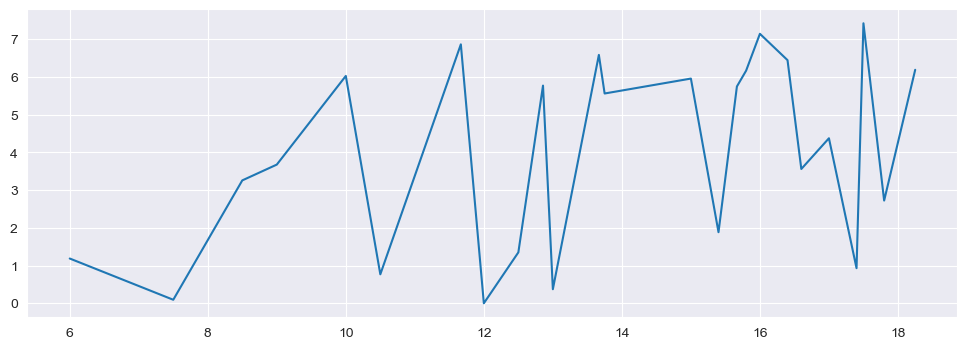

In [22]:
data = list(zip(past_ratios, true_perc))
ratio_to_perc = pd.DataFrame(data, columns=["ratio", "true_perc"]).sort_values("ratio")
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ratio_to_perc["ratio"], ratio_to_perc["true_perc"])
bin_labels = range(5)
ratio_to_perc["bin"], bin_edges = pd.cut(ratio_to_perc["ratio"], bins=5, labels=bin_labels, retbins=True)

bin_probs = ratio_to_perc.groupby("bin")["true_perc"].sum() / 100

# Display result
for i, prob in enumerate(bin_probs):
    interval = (bin_edges[i], bin_edges[i + 1])
    print(f"Bin {i + 1}: Range = {interval}, Probability = {prob:.4f}")


def compute_adj_shares(ratios, bin_probs, i=1):
    n_rows, n_cols = ratios.shape
    adjusted_all = np.zeros_like(ratios, dtype=float)

    for row_idx in range(n_rows):
        row_ratios = ratios[row_idx]
        transformed = row_ratios ** i

        bin_assignments, bin_edges = pd.cut(transformed, bins=5, labels=False, retbins=True)
        shares = transformed / np.sum(transformed)

        df = pd.DataFrame({
            "ratio": transformed,
            "prior_share": shares,
            "bin": bin_assignments
        })

        adjusted_shares = np.zeros_like(shares)

        for b in range(5):
            bin_mask = df["bin"] == b
            bin_total = df.loc[bin_mask, "prior_share"].sum()

            if bin_total > 0:
                scale = bin_probs[b] / bin_total
                adjusted_shares[bin_mask] = df.loc[bin_mask, "prior_share"] * scale

        adjusted_shares /= adjusted_shares.sum()
        adjusted_all[row_idx] = adjusted_shares

    return adjusted_all


# Show result
with np.printoptions(precision=3, suppress=True):
    print("Adjusted shares:\n", compute_adj_shares(ratios, bin_probs, 1))

In [23]:
for i in range(1, 10):
    adj_shares = compute_adj_shares(ratios, bin_probs, i)
    res = maximize_prior_top(adj_shares, 1)
    print("Exponent:", i, "Profit:", f"{res[0][0]:.2f}", "Optimal expeditions:", res[0][1])

Exponent: 1 Profit: 123452.46 Optimal expeditions: [(50, 4), (83, 7)]
Exponent: 2 Profit: 126046.86 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 3 Profit: 125614.76 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 4 Profit: 127282.67 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 5 Profit: 133915.89 Optimal expeditions: [(50, 4), (83, 7), (89, 8)]
Exponent: 6 Profit: 133929.92 Optimal expeditions: [(50, 4), (83, 7), (89, 8)]
Exponent: 7 Profit: 134019.72 Optimal expeditions: [(50, 4), (83, 7), (89, 8)]
Exponent: 8 Profit: 134173.98 Optimal expeditions: [(50, 4), (83, 7), (89, 8)]
Exponent: 9 Profit: 154477.92 Optimal expeditions: [(80, 6), (50, 4), (83, 7)]


# Modelling with exponential distribution

In [24]:
def compute_estimated_shares(naive_values, beta=0.7):
    """
    Compute estimated shares using a softmax transformation.

    Parameters
    ----------
    naive_values : array-like
        A naïve measure of container attractiveness.
    beta : float, optional
        Sensitivity parameter; higher beta accentuates differences in attractiveness.

    Returns
    -------
    np.ndarray
        Shares as fractions that sum to 1.
    """
    # Apply the softmax transformation: exp(beta * value) normalized by the sum.
    exp_vals = np.exp(beta * np.array(naive_values))
    shares = exp_vals / exp_vals.sum()
    return shares

In [25]:
# Compute estimated shares using the softmax approach.
estimated_shares = compute_estimated_shares(ratios, beta=0.25)

with np.printoptions(precision=3, suppress=True):
    print("Estimated Shares:", estimated_shares, sep='\n')

Estimated Shares:
[[0.04  0.032 0.028 0.068 0.06 ]
 [0.023 0.017 0.031 0.113 0.013]
 [0.1   0.04  0.136 0.008 0.017]
 [0.043 0.074 0.025 0.071 0.06 ]]


In [40]:
for i in range(3):
    shares = ratios**i
    shares = compute_estimated_shares(shares, beta = 0.25)
    res = maximize_prior_top(shares, 1)
    print("Exponent:", i, "Profit:", f"{res[0][0]:.2f}", "Optimal expeditions:", res[0][1])

Exponent: 0 Profit: 95083.33 Optimal expeditions: [(73, 4), (79, 5)]
Exponent: 1 Profit: 103692.53 Optimal expeditions: [(83, 7), (89, 8)]
Exponent: 2 Profit: 273139.17 Optimal expeditions: [(70, 4), (17, 1), (79, 5)]
